In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_o = pd.read_excel("/content/drive/MyDrive/mini project#1/파이널프로젝트_RAW_210329_210926.xlsx")

In [4]:
#원본 데이터 변경을 피하기 위해 복사본 사용
df_i = df_o.copy()

In [5]:
#내부결제로 추정되는 데이터 삭제
dellow = df_i.loc[df_i['id']==47361].index
df_i.drop(dellow, axis='index', inplace=True)

In [6]:
#기업 고객-B2B교육관련 내용 삭제
B2B = df_i[df_i['format'].str.contains("B2B", na=False, case=False)].index
df_i.drop(B2B,  axis='index', inplace=True)

In [7]:
#정부사업의 데이터 삭제하기
B2G = df_i[df_i['format'] == "B2G"].index
df_i.drop(B2G,  axis='index', inplace=True)

In [8]:
#결제가 되지 않은경우 format이 nan 값을 가짐
none = df_i.loc[df_i['format'].isnull()].index
df_i.drop(none, axis='index', inplace=True)

In [9]:
#환불된 경우 제외
minus = df_i.loc[df_i['transaction_amount'] < 0].index
df_i.drop(minus, axis='index', inplace=True)

In [10]:
#결제가된 정보를 분석하기 위해
df_ip = df_i[(df_i['type'] == 'PAYMENT') &  (df_i['state'] == 'COMPLETED')]

In [11]:
df_ip.sort_values('completed_at').tail()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
105411,1364969,669238.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-09-25 13:39:26,212000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,232000.0,232000.0,INICIS,CARD,디자인툴,2021-04-23
105412,1364976,384003.0,203178.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-09-25 13:46:29,149000,NaN,NaN,149000.0,149000.0,KAKAO,CARD,영상 편집,2020-12-02
105413,1364991,670891.0,203935.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 파이썬 웹 개발,프로그래밍,올인원,2021-09-25 14:01:26,159000,[미래투자금] 온라인 강의 2만원 할인쿠폰,20000.0,179000.0,179000.0,INICIS,CARD,백엔드 개발,2021-05-31
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105418,1365007,610626.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 14:25:47,139000,[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.0,169000.0,169000.0,NAVER,POINT,영상 편집,2021-08-17


In [12]:
df_ip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51179 entries, 2 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      51179 non-null  int64         
 1   customer_id             51179 non-null  float64       
 2   course_id               49200 non-null  float64       
 3   type                    51179 non-null  object        
 4   state                   51179 non-null  object        
 5   course_title            51179 non-null  object        
 6   category_title          51177 non-null  object        
 7   format                  51179 non-null  object        
 8   completed_at            51179 non-null  datetime64[ns]
 9   transaction_amount      51179 non-null  int64         
 10  coupon_title            23723 non-null  object        
 11  coupon_discount_amount  23723 non-null  float64       
 12  sale_price              51077 non-null  float

In [13]:
df_ip.describe()

,id,customer_id,course_id,transaction_amount,coupon_discount_amount,sale_price,tax_free_amount
count,5.117900e+04,51179.000000,49200.000000,5.117900e+04,2.372300e+04,5.107700e+04,5.107700e+04
mean,1.163893e+06,412282.672913,203900.413069,1.291844e+05,5.459843e+04,1.537650e+05,1.515048e+05
std,1.172120e+05,214112.119399,1402.561580,1.105564e+05,6.005448e+04,1.062397e+05,9.131884e+04
min,9.664500e+05,46.000000,200260.000000,0.000000e+00,4.950000e+02,1.000000e+00,1.000000e+00
25%,1.059286e+06,174068.500000,203078.000000,8.300000e+04,2.000000e+04,1.100000e+05,1.100000e+05
50%,1.156174e+06,500199.000000,203787.000000,1.190000e+05,3.000000e+04,1.365000e+05,1.365000e+05
75%,1.273280e+06,574562.500000,204871.000000,1.590000e+05,8.875000e+04,1.710000e+05,1.710000e+05
max,1.381657e+06,670891.000000,207556.000000,1.800000e+06,2.000000e+06,2.000000e+06,2.000000e+06


In [14]:
#RFM분석: 고객의 최근성(어떤 고객이 최근에 구매한 고객인가), 고객의 구매빈도, 고객의 구매금액을 분석하여
#고객의 타입을 나눠 마케팅 전략을 세우는데 이용됨.
#이를 위해 자료에서 최근 구매일을 기준으로 고객별 최근 구매일을 구하고, 고객의 구매빈도를 구하고 구매금액을 분석해서 어떤 고객군으로 나눌 수 있는지 기준을 세우고자 함.
#나눠진 고객군을 바탕으로 효과적인 마케팅 방안을 찾아보고자 함.

In [15]:
#Recency
df_user = pd.DataFrame(df_ip['customer_id'])
df_user.columns=['customer_id']
df_max_purchase = df_ip.groupby('customer_id')['completed_at'].max().reset_index() #고객별로 최근 구매한 일자를 구하기 위해 max함수를 이용
df_max_purchase.rename(columns = {'completed_at': 'max_purchase'}, inplace = True)

In [16]:
df_max_purchase['recency'] = (df_max_purchase['max_purchase'].max() - df_max_purchase['max_purchase']).dt.days
df_user = pd.merge(df_user, df_max_purchase[['customer_id', 'recency']], on='customer_id')

In [17]:
df_user

,customer_id,recency
0,72297.0,42
1,72297.0,42
2,72297.0,42
3,72297.0,42
4,72297.0,42
...,...,...
51174,545804.0,0
51175,669238.0,0
51176,670891.0,0
51177,640697.0,0


In [18]:
#중복 데이터를 삭제
df_user = df_user.drop_duplicates(['customer_id'])

In [19]:
#recency가 0이면 최근 구매일(9월 25일)에 구매를 한 고객이고, recency가 42인 고객은 9월 25일 -42일 전에 결제를 한 고객입니다.

In [20]:
df_user.recency.describe()

count    38078.000000
mean        89.983009
std         52.419365
min          0.000000
25%         43.000000
50%         89.000000
75%        135.000000
max        180.000000
Name: recency, dtype: float64

<Figure size 720x576 with 0 Axes>

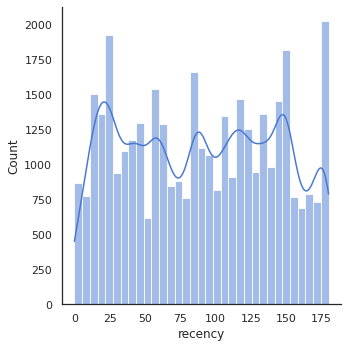

In [21]:
plt.figure(figsize=(10, 8))
sns.set(palette='muted', color_codes=True, style='white')
sns.displot(df_user, x='recency', kde=True)
plt.show()

In [22]:
#가장 최근 구매일(2021-09-25 14:25:47)로부터 개별 고객의 최근 구매일이 평균적으로 83일정도 차이를 보인다는 그래프

In [23]:
#frequency
df_frequency = df_ip.groupby ('customer_id').completed_at.count().reset_index()
df_frequency.rename(columns={'completed_at':'frequency'}, inplace = True)

df_user = pd.merge(df_user, df_frequency, on='customer_id')
df_user

,customer_id,recency,frequency
0,72297.0,42,5
1,478028.0,180,1
2,478033.0,180,1
3,469860.0,180,1
4,478035.0,180,1
...,...,...,...
38073,545804.0,0,1
38074,669238.0,0,1
38075,670891.0,0,1
38076,640697.0,0,1


In [24]:
df_user.describe()

,customer_id,recency,frequency
count,38078.000000,38078.000000,38078.000000
mean,437738.452650,89.983009,1.344057
std,203977.016555,52.419365,1.121286
min,46.000000,0.000000,1.000000
25%,287879.750000,43.000000,1.000000
50%,516460.500000,89.000000,1.000000
75%,586027.750000,135.000000,1.000000
max,670891.000000,180.000000,53.000000


In [25]:
df_user.sort_values('frequency').tail(20)

,customer_id,recency,frequency
7894,273223.0,148,15
2517,270542.0,11,15
2114,14845.0,10,16
4279,98499.0,19,16
270,417924.0,7,18
7678,631.0,38,19
21198,502821.0,82,19
2090,72501.0,5,21
832,6526.0,4,22
644,20784.0,17,26


In [26]:
df_ip.loc[df_i['customer_id'] == 98685.0	]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
5119,984635,98685.0,201998.0,PAYMENT,COMPLETED,올인원 패키지 : iOS 앱 개발,프로그래밍,올인원,2021-04-01 10:19:28,24800,수강생 50만명 돌파 기념 감사제 쿠폰,87200.0,112000.0,112000.0,NaN,CARD,모바일앱,2020-01-14 00:00:00
6337,988664,98685.0,204342.0,PAYMENT,COMPLETED,"올인원 패키지 : GA4 탑재, 구글 애널리틱스 끝장내기",마케팅,올인원,2021-04-03 00:08:50,55300,GA4 30% 할인쿠폰,23700.0,79000.0,79000.0,NaN,CARD,데이터마케팅,2021-04-02 00:00:00
6936,990338,98685.0,201798.0,PAYMENT,COMPLETED,올인원 패키지 : 브랜딩 2020,마케팅,올인원,2021-04-04 10:08:51,162100,NaN,NaN,162100.0,162100.0,NaN,CARD,SNS마케팅,2019-11-11 00:00:00
22011,1037244,98685.0,200399.0,PAYMENT,COMPLETED,올인원 패키지 : 리더를 위한 HR/인재경영,업무 생산성,올인원,2021-04-28 21:10:57,0,4월 1+1 페이백 이벤트 쿠폰,162100.0,111000.0,111000.0,NaN,PROMOTION,리더십,2019-03-22 00:00:00
22012,1037248,98685.0,201849.0,PAYMENT,COMPLETED,올인원 패키지 : 그로스 마케팅,마케팅,올인원,2021-04-28 21:11:43,0,4월 1+1 페이백 이벤트 쿠폰,178000.0,123000.0,123000.0,NaN,PROMOTION,데이터마케팅,2019-11-25 00:00:00
22014,1037252,98685.0,204286.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 3D 디자인 툴,디자인,올인원,2021-04-28 21:12:57,153300,초격차 패키지 : 한번에 끝내는 3D 디자인툴 30% 할인 쿠폰,65700.0,219000.0,219000.0,INICIS,CARD,디자인툴,2021-04-23 00:00:00
23448,1041392,98685.0,204775.0,PAYMENT,COMPLETED,입만 열면 인정받는 스피치 10분컷,업무 생산성,하루10분컷,2021-04-30 09:21:48,19500,NaN,NaN,19500.0,19500.0,INICIS,CARD,NaN,2021-04-28 00:00:00
28280,1054819,98685.0,204773.0,PAYMENT,COMPLETED,이것만 배우면 끝 PPT 10분컷,업무 생산성,하루10분컷,2021-05-06 09:33:53,19900,NaN,NaN,19900.0,19900.0,INICIS,CARD,NaN,2021-04-28 00:00:00
33455,1069671,98685.0,204631.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 node.js 웹 프로그래밍,프로그래밍,올인원,2021-05-13 23:03:57,69000,[럭키룰렛] 올인원패키지,10000.0,79000.0,79000.0,INICIS,CARD,백엔드 개발,NaT
50612,1127326,98685.0,201520.0,PAYMENT,COMPLETED,올인원 패키지 : AWS/Docker 클라우드 서버 구축,프로그래밍,올인원,2021-06-08 11:12:38,32500,5월 페이백 프로모션 쿠폰,80000.0,112500.0,112500.0,INICIS,CARD,DevOps,NaT


In [27]:
#별다른 이상체는 보이지 않으니 삭제하지 않고 분석을 진행하겠습니다.

<Figure size 720x576 with 0 Axes>

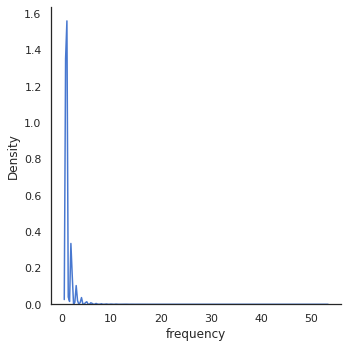

In [28]:
plt.figure(figsize=(10, 8))
sns.set(palette='muted', color_codes=True, style='white')
sns.displot(df_user, x='frequency', kind='kde')
plt.show()

In [29]:
#보통 1번 구매한 고객이 가장 많았고 최다 구매기록은 53회로 집계되었습니다.

In [30]:
#monetary 결제금액을 뜻하며 쿠폰등을 통해 결제할때 등을 고려해 소비자가 인지하는 구매금액인 transaction amount로 결졍했습니다.
df_monetary = df_ip.groupby('customer_id').transaction_amount.sum().reset_index()
df_monetary.rename(columns={'transaction_amount':'monetary'}, inplace = True)
df_user = pd.merge(df_user, df_monetary, on = 'customer_id')

In [31]:
df_user.describe()

,customer_id,recency,frequency,monetary
count,38078.000000,38078.000000,38078.000000,3.807800e+04
mean,437738.452650,89.983009,1.344057,1.736312e+05
std,203977.016555,52.419365,1.121286,1.806426e+05
min,46.000000,0.000000,1.000000,0.000000e+00
25%,287879.750000,43.000000,1.000000,9.800000e+04
50%,516460.500000,89.000000,1.000000,1.320000e+05
75%,586027.750000,135.000000,1.000000,1.980000e+05
max,670891.000000,180.000000,53.000000,7.040750e+06


In [32]:
#결제금액이...0원?
df_i.loc[df_i['transaction_amount'] == 0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
357,971612,14030.0,203525.0,PAYMENT,COMPLETED,초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터,프로그래밍,올인원,2021-03-28 22:26:58,0,한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2...,110500.0,110500.0,110500.0,NaN,PROMOTION,백엔드 개발,2021-02-01
508,972001,458172.0,201478.0,PAYMENT,COMPLETED,올인원 패키지 : TypeScript & Angular 실전,프로그래밍,올인원,2021-03-29 00:14:32,0,수강생 50만명 돌파 기념 감사제 쿠폰,111000.0,101000.0,101000.0,NaN,PROMOTION,프론트엔드 개발,NaT
527,972056,464239.0,201435.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 00:55:02,0,수강생 50만명 돌파 기념 감사제 쿠폰,117500.0,110500.0,110500.0,NaN,PROMOTION,개발자 커리어,NaT
545,972116,440315.0,201518.0,PAYMENT,COMPLETED,합격 패스 : 정보처리기사 필기&실기,프로그래밍,올인원,2021-03-29 01:51:17,0,[웰컴쿠폰] 올인원 패키지 1만원 할인 쿠폰,10000.0,9900.0,9900.0,NaN,PROMOTION,개발자 커리어,NaT
547,972122,440315.0,201435.0,PAYMENT,COMPLETED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-29 01:56:59,0,수강생 50만명 돌파 기념 감사제 쿠폰,115500.0,110500.0,110500.0,NaN,PROMOTION,개발자 커리어,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105179,1363763,23638.0,206742.0,PAYMENT,COMPLETED,올인원 패키지 : 클라우드를 활용한 데이터 파이프라인 구축,데이터사이언스,올인원,2021-09-24 15:10:10,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,409000.0,409000.0,409000.0,NaN,PROMOTION,데이터엔지니어링,2021-09-13
105197,1363886,377623.0,206257.0,PAYMENT,COMPLETED,초격차 패키지 : 게임 개발자 취업의 모든 것,프로그래밍,올인원,2021-09-24 15:58:22,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,269000.0,269000.0,269000.0,NaN,PROMOTION,게임,2021-08-09
105261,1364276,455280.0,203529.0,PAYMENT,COMPLETED,올인원 패키지 : 6개월 치 업무를 하루 만에 끝내는 업무자동화,업무 생산성,올인원,2021-09-24 17:58:18,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,159000.0,159000.0,159000.0,NaN,PROMOTION,업무자동화,2020-11-25
105273,1364341,475055.0,205579.0,PAYMENT,COMPLETED,올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략,투자/재테크,올인원,2021-09-24 18:56:08,0,MacBook Pass 수강생 감사 100% 할인 쿠폰,329000.0,329000.0,329000.0,NaN,PROMOTION,주식 투자,2021-07-13


In [33]:
#무료쿠폰을...넣어야 할까 고민하다 일단 넣었습니다. 

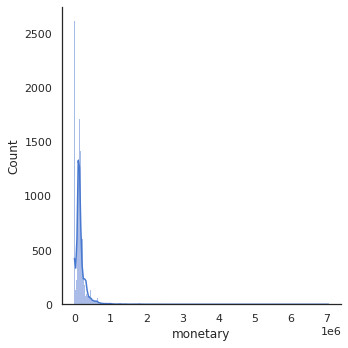

In [34]:
sns.set(palette='muted', color_codes=True,  style='white')
sns.displot(df_user, x='monetary', kde=True)
plt.show()

In [35]:
df_user.describe()

,customer_id,recency,frequency,monetary
count,38078.000000,38078.000000,38078.000000,3.807800e+04
mean,437738.452650,89.983009,1.344057,1.736312e+05
std,203977.016555,52.419365,1.121286,1.806426e+05
min,46.000000,0.000000,1.000000,0.000000e+00
25%,287879.750000,43.000000,1.000000,9.800000e+04
50%,516460.500000,89.000000,1.000000,1.320000e+05
75%,586027.750000,135.000000,1.000000,1.980000e+05
max,670891.000000,180.000000,53.000000,7.040750e+06


In [36]:
# 각 요소별로 고객에게 점수 매기기 recency는 최근 방문한 고객일 수록 높은 점수를 주었습니다.
def rec(x):
  if x <= 43:
    return 4
  elif x <= 89:
    return 3
  elif x <=135:
    return 2
  else:
    return 1

df_user['recency_score'] = df_user['recency'].map(rec)

In [37]:
def fre(x):
  if x <= 1:
    return 3
  elif x <= 20:
    return 2
  else:
    return 1
#1의 값이 대부분이고 53회 등의 나머지 값을 한 그룹으로 묶고 그 사이의 값을 다른 그룹으로 묶었습니다.
df_user['frequency_score'] = df_user['frequency'].map(fre)

In [38]:
def rev(x):
  if x <= 9.800000e+04:
    return 1
  elif x <= 1.320000e+05:
    return 2
  elif x<= 1.980000e+05:
    return 3
  else:
    return 4

df_user['monetary_score'] = df_user['monetary'].map(rev)

In [39]:
df_user

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score
0,72297.0,42,5,513310,4,2,4
1,478028.0,180,1,97500,1,3,1
2,478033.0,180,1,96000,1,3,1
3,469860.0,180,1,263000,1,3,4
4,478035.0,180,1,91000,1,3,1
...,...,...,...,...,...,...,...
38073,545804.0,0,1,1800000,4,3,4
38074,669238.0,0,1,212000,4,3,4
38075,670891.0,0,1,159000,4,3,3
38076,640697.0,0,1,96000,4,3,1


In [40]:
#보통 RFM분석은 중요한 요소에 가중치를 두어 계산합니다. 보통...매출기여도에 가장 많이 기여한 요소에 높은 가중치를 둡니다만....
#이번 분석은 그냥 점수에 따라 고객을 분류하겠습니다.
#type1 초우량 고객 rfm이 모두 높음 -> vip제도를 통해 특별 대우
#type2 저수익성 고객 rf는 높지만 m이 낮음 -> 상품에 대한 관심은 많지만 구매를 망설이는 고객: 대부분의 마케팅 전략에서는 이들을 버리고 가는 방식을 취합니다.
#type3 신규고객rm은 높지만 f가 낮은 고객 -> 앞으로 성장할 가능성이 있는 고객, 상품에 대한 구매를 자극하여 우량고객으로 성장
#type4 이탈고객 fm은 높지만r이 낮은 고객 -> 예전에는 많이 이용했지만 지금은 이용하지 않는 고객, 재활성화를 위한 프로모션, 할인 서비스 등을 제공
#type5 - > 아직 정보를 충분히 얻지 못한 고객

In [41]:
def type(x,y,z):
  if x >= 3 and y>= 2 and z >= 3:
    return "type_1"
  elif x >= 2 and y >= 2 and z >= 2:
    return "type_2"
  elif x >= 2 and z >= 1 and y < 2:
    return "type_3"
  elif y >= 2 and z >= 1 and x >= 1:
    return "type_4"
  else:
    return "tyep_5"

In [42]:
df_user['customer_type'] = df_user.apply(lambda row: type(row['recency_score'], row['frequency_score'], row['monetary_score']), axis=1)

In [43]:
df_user

,customer_id,recency,frequency,monetary,recency_score,frequency_score,monetary_score,customer_type
0,72297.0,42,5,513310,4,2,4,type_1
1,478028.0,180,1,97500,1,3,1,type_4
2,478033.0,180,1,96000,1,3,1,type_4
3,469860.0,180,1,263000,1,3,4,type_4
4,478035.0,180,1,91000,1,3,1,type_4
...,...,...,...,...,...,...,...,...
38073,545804.0,0,1,1800000,4,3,4,type_1
38074,669238.0,0,1,212000,4,3,4,type_1
38075,670891.0,0,1,159000,4,3,3,type_1
38076,640697.0,0,1,96000,4,3,1,type_4


In [44]:
df_user['customer_type'].value_counts()

type_4    14872
type_1    12723
type_2    10470
type_3       13
Name: customer_type, dtype: int64

In [45]:
avg_monetary = df_user.groupby('customer_type').monetary.agg(['mean','min','max'])
avg_monetary

,mean,min,max
customer_type,,,
type_1,2.683225e+05,132400,3070500
type_2,1.613103e+05,98300,2482700
type_3,2.233985e+06,0,7040750
type_4,9.949579e+04,0,1738500


In [46]:
#고객 그룹별로 관심있는 분야를 알아내면 마케팅 전략을 짜는데 도움이 되지 않을꺼?
#관심있는 분야는 자주 구매한 분야로 정의내렸습니다.

In [47]:
df_o['category_title'].unique()

array(['프로그래밍', '영상/3D', '업무 생산성', '크리에이티브', '부동산/금융', '데이터사이언스', '디자인',
       '마케팅', '교육', '투자/재테크', nan, '관리', '데이터 사이언스', '비즈니스', '지식콘텐츠',
       '일러스트', '파이낸스'], dtype=object)

In [48]:
df_it = df_em = pd.DataFrame(df_ip, columns=['customer_id', 'category_title', 'completed_at'])
df_it

,customer_id,category_title,completed_at
2,72297.0,프로그래밍,2021-03-28 15:21:43
4,478028.0,업무 생산성,2021-03-28 15:21:54
8,478033.0,영상/3D,2021-03-28 15:26:47
10,469860.0,부동산/금융,2021-03-28 15:27:17
14,478035.0,프로그래밍,2021-03-28 15:31:01
...,...,...,...
105411,669238.0,디자인,2021-09-25 13:39:26
105412,384003.0,영상/3D,2021-09-25 13:46:29
105413,670891.0,프로그래밍,2021-09-25 14:01:26
105416,640697.0,영상/3D,2021-09-25 14:17:41


In [49]:
df_it = pd.merge(df_it, df_user[['customer_id', 'customer_type']], on='customer_id')

In [50]:
df_it.head(10)

,customer_id,category_title,completed_at,customer_type
0,72297.0,프로그래밍,2021-03-28 15:21:43,type_1
1,72297.0,프로그래밍,2021-04-11 15:18:35,type_1
2,72297.0,영상/3D,2021-06-30 20:24:24,type_1
3,72297.0,업무 생산성,2021-06-30 20:29:12,type_1
4,72297.0,투자/재테크,2021-08-13 21:30:43,type_1
5,478028.0,업무 생산성,2021-03-28 15:21:54,type_4
6,478033.0,영상/3D,2021-03-28 15:26:47,type_4
7,469860.0,부동산/금융,2021-03-28 15:27:17,type_4
8,478035.0,프로그래밍,2021-03-28 15:31:01,type_4
9,478031.0,데이터사이언스,2021-03-28 15:33:28,type_4


In [51]:
df_ip.loc[df_ip['customer_id'] == 72297.0]

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
11298,1004099,72297.0,203720.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 프론트엔드 개발,프로그래밍,올인원,2021-04-11 15:18:35,113000,NaN,NaN,113000.0,113000.0,INICIS,CARD,프론트엔드 개발,2021-02-02
65792,1181420,72297.0,205162.0,PAYMENT,COMPLETED,올인원 패키지 : 아카데미 : 편집하는여자의 영상편집 마스터클래스 - 제 1강 프리...,영상/3D,올인원,2021-06-30 20:24:24,98000,NaN,NaN,98000.0,98000.0,PAYCO,CARD,영상 편집,2021-06-03
65808,1181456,72297.0,204373.0,PAYMENT,COMPLETED,초격차 패키지 : 일잘러 필수 스킬 모음.zip,업무 생산성,올인원,2021-06-30 20:29:12,109000,NaN,NaN,109000.0,109000.0,PAYCO,CARD,PPT/보고서,2021-06-04
88388,1285179,72297.0,202789.0,PAYMENT,COMPLETED,올인원 패키지 : 2021 취업/이직/투자를 위한 기업분석,투자/재테크,올인원,2021-08-13 21:30:43,21500,7월 100% 페이백 프로모션 쿠폰,103000.0,124500.0,124500.0,PAYCO,CARD,주식 투자,2020-09-11


In [52]:
#혹시 고객타입별로 선호하는 분야가 있지 않을까?
df_it['completed_at'] = df_it['completed_at'].dt.strftime('%Y-%m')

In [53]:
df_it

,customer_id,category_title,completed_at,customer_type
0,72297.0,프로그래밍,2021-03,type_1
1,72297.0,프로그래밍,2021-04,type_1
2,72297.0,영상/3D,2021-06,type_1
3,72297.0,업무 생산성,2021-06,type_1
4,72297.0,투자/재테크,2021-08,type_1
...,...,...,...,...
51174,545804.0,디자인,2021-09,type_1
51175,669238.0,디자인,2021-09,type_1
51176,670891.0,프로그래밍,2021-09,type_1
51177,640697.0,영상/3D,2021-09,type_4


In [54]:
#고객타입별로 가장 관심있는 상위4개의 카테고리 구하기
customer_interest = df_it.groupby('customer_type')['category_title'].value_counts()

In [55]:
customer_interest

customer_type  category_title
type_1         프로그래밍             6596
               데이터사이언스           3133
               디자인               2625
               영상/3D             2025
               마케팅               2006
               업무 생산성            1609
               부동산/금융            1381
               투자/재테크            1128
               크리에이티브             272
               비즈니스                16
               파이낸스                16
               지식콘텐츠               10
type_2         프로그래밍             3805
               업무 생산성            2201
               디자인               1604
               영상/3D             1475
               데이터사이언스           1429
               마케팅               1273
               부동산/금융             742
               크리에이티브             213
               투자/재테크             144
               지식콘텐츠                9
               데이터 사이언스             5
               관리                   1
               비즈니스                 1
type_3         프로그래밍

In [56]:
df_ci = pd.DataFrame(customer_interest)

In [57]:
df_ci

category_title
customer_type category_title                
type_1        프로그래밍                     6596
              데이터사이언스                   3133
              디자인                       2625
              영상/3D                     2025
              마케팅                       2006
              업무 생산성                    1609
              부동산/금융                    1381
              투자/재테크                    1128
              크리에이티브                     272
              비즈니스                        16
              파이낸스                        16
              지식콘텐츠                       10
type_2        프로그래밍                     3805
              업무 생산성                    2201
              디자인                       1604
              영상/3D                     1475
              데이터사이언스                   1429
              마케팅                       1273
              부동산/금융                     742
              크리에이티브                     213
              투자/재테크                     144
              지식콘텐츠                        9
              데이터 사이언스                     5
              관리                           1
              비즈니스                         1
type_3        프로그래밍                      133
              데이터사이언스                     62
              디자인                         52
              마케팅                         52
              영상/3D                       45
              업무 생산성                      44
              부동산/금융                      39
              투자/재테크                      18
              지식콘텐츠                        3
              크리에이티브                       1
type_4        프로그래밍                     6356
              업무 생산성                    2763
              데이터사이언스                   2235
              영상/3D                     1608
              디자인                       1434
              마케팅                       1371
              부동산/금융                     697
              크리에이티브                     340
              투자/재테크                     200
              비즈니스                         4
              지식콘텐츠                        1

In [58]:
df_ci.rename(columns={'category_title':'category_value'}, inplace = True) #데이터값에 따라 컬럼의 이름을 바꿔줍니다.

In [59]:
df_ci.reset_index(inplace=True) #데이터프레임에서 다중 인덱스로 설저된 부분을 바꿉니다.

In [60]:
df_ci

,customer_type,category_title,category_value
0,type_1,프로그래밍,6596
1,type_1,데이터사이언스,3133
2,type_1,디자인,2625
3,type_1,영상/3D,2025
4,type_1,마케팅,2006
5,type_1,업무 생산성,1609
6,type_1,부동산/금융,1381
7,type_1,투자/재테크,1128
8,type_1,크리에이티브,272
9,type_1,비즈니스,16


In [61]:
#각 타입별로 가장 많이 구매한 4개의 분야 고르기
df_top_4 = df_ci.sort_values('category_value', ascending=False).groupby('customer_type').head(4)

In [62]:
df_top_4

,customer_type,category_title,category_value
0,type_1,프로그래밍,6596
35,type_4,프로그래밍,6356
12,type_2,프로그래밍,3805
1,type_1,데이터사이언스,3133
36,type_4,업무 생산성,2763
2,type_1,디자인,2625
37,type_4,데이터사이언스,2235
13,type_2,업무 생산성,2201
3,type_1,영상/3D,2025
38,type_4,영상/3D,1608


In [63]:
#보기 편하기 위해 고객 타입순으로, 각 그룹 내에서는 내림차순으로 정렬
df_top_4.sort_values(['customer_type', 'category_value'], ascending=[True, False])

,customer_type,category_title,category_value
0,type_1,프로그래밍,6596
1,type_1,데이터사이언스,3133
2,type_1,디자인,2625
3,type_1,영상/3D,2025
12,type_2,프로그래밍,3805
13,type_2,업무 생산성,2201
14,type_2,디자인,1604
15,type_2,영상/3D,1475
25,type_3,프로그래밍,133
26,type_3,데이터사이언스,62


In [64]:
#위의 결과를 통해 고객 분류에 상관없이 프로그래밍에 대한 관심도가 가장 높은 것으로 보아 프로그래밍 제품에 대해 마케팅 전략을 펼친다면 모든 고객에게 영향을 미칠것으로 예상됩니다.
#type4는 이탈고객으로 예전에 비해 현재 이용율이 높지 않은 그룹입니다. 이들의 관심을 끌기 위해 업무생산성이나 데이터 사이언스 부분에 대한 프로모션이나 할인쿠폰등을 이용하면 
#이들의 관심을 끌 수 있을 것입니다.
#데이터 사이언스 부문에 대한 마케팅 전략은 앞으로 우량고객이 될 수 있는 type3의 관심사와도 겹치기 때문에 효과적일 것입니다.